In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Warm-up

In [2]:
df_citibike = pd.read_csv("202307-citibike-tripdata.csv")

/var/folders/2x/mz7t86dd72bf_xkr50l46prr0000gn/T/ipykernel_10432/485651623.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_citibike = pd.read_csv("202307-citibike-tripdata.csv")


In [3]:
df_citibike.started_at = pd.to_datetime(df_citibike.started_at)
df_citibike.ended_at = pd.to_datetime(df_citibike.ended_at)

In [4]:
df_citibike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BC78328130CD8A16,classic_bike,2023-07-16 20:42:57,2023-07-16 20:45:13,St. Nicholas Ave & W 126 St,7756.10,Adam Clayton Powell Blvd & W 126 St,7738.04,40.811432,-73.951878,40.809495,-73.947765,member
1,71A4DFA231ADAEA2,classic_bike,2023-07-29 12:22:21,2023-07-29 12:26:54,Adam Clayton Powell Blvd & W 118 St,7670.09,Adam Clayton Powell Blvd & W 126 St,7738.04,40.804372,-73.951475,40.809495,-73.947765,member
2,B64451D0D9F52134,classic_bike,2023-07-30 18:30:18,2023-07-30 18:35:42,St. Nicholas Ave & W 126 St,7756.10,Lenox Ave & W 130 St,7753.13,40.811378,-73.951827,40.810792,-73.943068,member
3,EEECB3E0E05EB0DB,classic_bike,2023-07-04 19:59:20,2023-07-04 20:02:03,St. Nicholas Ave & W 126 St,7756.10,Adam Clayton Powell Blvd & W 126 St,7738.04,40.811432,-73.951878,40.809495,-73.947765,member
4,76B706DF4FC180DC,classic_bike,2023-07-03 19:33:36,2023-07-03 19:43:59,St. Nicholas Ave & W 126 St,7756.10,Pleasant Ave & E 116 St,7450.05,40.811543,-73.951813,40.794988,-73.933335,member


In [5]:
df_citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776256 entries, 0 to 3776255
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 374.5+ MB


In [6]:
df_citibike = df_citibike.dropna()

In [7]:
df_citibike["duration"] = (df_citibike.ended_at - df_citibike.started_at).dt.total_seconds() / 60

In [8]:
df_citibike.duration

0           2.266667
1           4.550000
2           5.400000
3           2.716667
4          10.383333
             ...    
3776251    26.650000
3776252    28.316667
3776253     4.450000
3776254    10.683333
3776255     2.566667
Name: duration, Length: 3767347, dtype: float64

In [9]:
df_citibike = df_citibike[df_citibike.duration < 60*3]
df_citibike = df_citibike[df_citibike.duration > 0]

## Duration Histogram

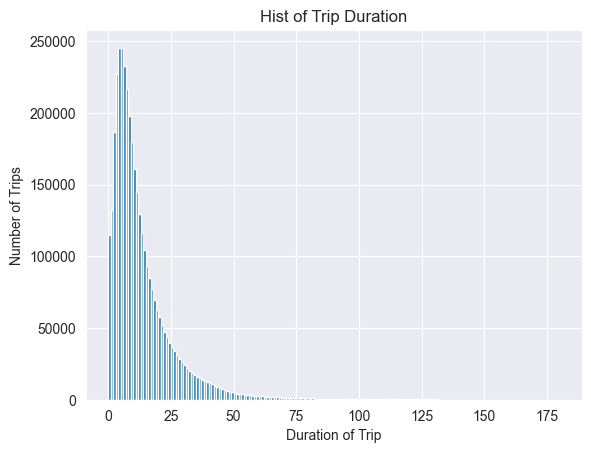

In [10]:
plt.hist(df_citibike.duration, bins=3*60)
plt.title("Hist of Trip Duration")
plt.xlabel("Duration of Trip")
plt.ylabel("Number of Trips")
plt.show()

## Average Ride Duration, Variance, and $\mathbb{P}$(Duration $>$ 20)

In [11]:
total = len(df_citibike)

In [12]:
avg_dur = df_citibike.duration.mean()
print(f"Average Duration = {avg_dur}")

Average Duration = 13.560221346513465


In [13]:
var_dur = df_citibike.duration.var()
print(f"Varianve of Duration = {var_dur}")

Varianve of Duration = 196.69836284914493


In [14]:
gt_20 = (df_citibike.duration > 20).sum()
p_dur_20 = gt_20 / total
print(f"P(duration > 20) = {p_dur_20}")

P(duration > 20) = 0.19654085290380166


## $\mathbb{P}$(Duration > 20 | CitiBike Memeber)

In [15]:
p_citibike_mem = (df_citibike.member_casual == "member").sum() / total
p_cbmem_and_dur20 = ((df_citibike.member_casual == "member") & (df_citibike.duration > 20)).sum() / total
p_dur20_given_citibike_mem = p_cbmem_and_dur20 / p_citibike_mem
print(f"P(duration > 20 | CitiBike Member) = {p_dur20_given_citibike_mem}")

P(duration > 20 | CitiBike Member) = 0.1546848321918055


## $\mathbb{P}$(CitiBike Member | Duration > 25)

In [16]:
p_dur_25 = (df_citibike.duration > 25).sum() / total
p_cbmem_and_dur25 = ((df_citibike.member_casual == "member") & (df_citibike.duration > 25)).sum() / total
p_dur25_given_citibike_mem = p_cbmem_and_dur25 / p_dur_25
print(f"P(CitiBike Member | duration > 25) = {p_dur25_given_citibike_mem}")

P(CitiBike Member | duration > 25) = 0.5787196676877677


## Expected duration of Electric Bike vs. Classic Bike

In [17]:
df_elecbike = df_citibike[df_citibike.rideable_type == "electric_bike"]
df_clasbike = df_citibike[df_citibike.rideable_type == "classic_bike"]

In [18]:
avg_dur_eb = df_elecbike.duration.mean()
avg_dur_cb = df_clasbike.duration.mean()
print(f"Expected Duration: ebike={avg_dur_eb} ; classic-bike={avg_dur_cb}")

Expected Duration: ebike=12.280488130239785 ; classic-bike=13.63475766258535


## $\mathbb{P}$(Electric Bike | Duration < 10) and $\mathbb{P}$(Classic Bike | Duration < 10)

In [19]:
p_d10 = (df_citibike.duration < 10).sum() / total
p_eb_and_d10 = ((df_citibike.rideable_type == "electric_bike") & (df_citibike.duration < 10)).sum() / total
p_cb_and_d10 = ((df_citibike.rideable_type == "classic_bike") & (df_citibike.duration < 10)).sum() / total
p_eb_given_d10 = p_eb_and_d10 / p_d10
p_cb_given_d10 = p_cb_and_d10 / p_d10
print(f"P(E-bike | duration < 10)={p_eb_given_d10}\nP(classic-bike | duration < 10)={p_cb_given_d10}")

P(E-bike | duration < 10)=0.08921668362156664
P(classic-bike | duration < 10)=0.9101774950274062


# Project Portion

## Select Stations

In [20]:
df_start = df_citibike.groupby(["start_station_id", "start_station_name"]).ride_id.count().sort_values(ascending=False)

In [21]:
df_start.head(25)

start_station_id  start_station_name         
6140.05           W 21 St & 6 Ave                12453
5329.03           West St & Chambers St          12361
6948.10           Broadway & W 58 St             11097
6726.01           11 Ave & W 41 St               10559
6364.07           6 Ave & W 33 St                10130
6765.01           12 Ave & W 40 St               10015
6157.04           10 Ave & W 14 St                9999
5184.08           West St & Liberty St            9752
5905.14           University Pl & E 14 St         9682
6912.01           7 Ave & Central Park South      9656
6822.09           1 Ave & E 68 St                 9631
5980.07           E 17 St & Broadway              9308
6173.08           Broadway & W 25 St              8960
6459.07           W 30 St & 10 Ave                8929
5696.03           Pier 40 - Hudson River Park     8904
5905.12           Broadway & E 14 St              8686
5492.05           Cleveland Pl & Spring St        8682
6331.01           W

In [22]:
df_end = df_citibike.groupby(["end_station_id", "end_station_name"]).ride_id.count().sort_values(ascending=False)

In [23]:
df_end.head(25)

end_station_id  end_station_name           
6140.05         W 21 St & 6 Ave                13658
6948.10         Broadway & W 58 St             12028
6726.01         11 Ave & W 41 St               11967
6912.01         7 Ave & Central Park South     11391
6364.07         6 Ave & W 33 St                11091
6765.01         12 Ave & W 40 St               10899
5905.14         University Pl & E 14 St        10548
6822.09         1 Ave & E 68 St                10403
5980.07         E 17 St & Broadway             10242
6459.07         W 30 St & 10 Ave               10003
5905.12         Broadway & E 14 St              9642
5492.05         Cleveland Pl & Spring St        9588
6331.01         W 31 St & 7 Ave                 9576
6197.08         E 33 St & 1 Ave                 9527
6535.04         W 34 St & Hudson Blvd E         9090
6450.12         8 Ave & W 33 St                 9079
5696.03         Pier 40 - Hudson River Park     8995
5788.13         Lafayette St & E 8 St           8929
64

Stations Selected
- 6948.10, Broadway & W 58 St, 11097
- 5184.08, West St & Liberty St 9752
- 5696.03, Pier 40 - Hudson River Park, 8995

In [24]:
station_1_id = "6948.10"
station_2_id = "5184.08"
station_3_id = "5696.03"
station_ids = [station_1_id, station_2_id, station_3_id]
station_map = {
    '6948.10': {
        "station_name": 'Broadway & W 58 St', 
        "dock_size": 53
    },
    '5184.08': {
        "station_name": 'West St & Liberty St', 
        "dock_size": 34
    },
    '5696.03': {
        "station_name": 'Pier 40 - Hudson River Park', 
        "dock_size": 19
    },
}

In [25]:
mask_st = df_citibike.start_station_id.isin(station_ids)
mask_end = df_citibike.end_station_id.isin(station_ids)
df_stations = df_citibike[mask_st | mask_end].reset_index(drop=True)

In [26]:
df_stations = df_stations.drop(["start_lat", "start_lng", "end_lat", "end_lng"], axis=1)

## Remove Weekends

In [27]:
df_stations["weekday_start"] = df_stations["started_at"].dt.dayofweek
df_stations["weekday_end"] = df_stations["ended_at"].dt.dayofweek
mask_st = (df_stations.weekday_start < 5) & (df_stations.start_station_id.isin(station_ids))
mask_end = (df_stations.weekday_end < 5) & (df_stations.end_station_id.isin(station_ids))
df_stations = df_stations[mask_st | mask_end]

## Extract 5 min intervals

In [28]:
# Extract the time part
df_stations['start_bin'] = ((df_stations['started_at'].dt.hour * 60 + df_stations['started_at'].dt.minute) // 5)
df_stations['end_bin'] = ((df_stations['ended_at'].dt.hour * 60 + df_stations['ended_at'].dt.minute) // 5)

In [29]:
df_stations.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,duration,weekday_start,weekday_end,start_bin,end_bin
0,D885F77723C75623,classic_bike,2023-07-11 19:11:32,2023-07-11 19:17:07,Pier 40 - Hudson River Park,5696.03,Greenwich St & Hubert St,5470.10,member,5.583333,1,1,230,231
1,6F662CC1D61C7D14,classic_bike,2023-07-07 07:26:31,2023-07-07 07:29:46,Pier 40 - Hudson River Park,5696.03,Greenwich St & Hubert St,5470.10,casual,3.250000,4,4,89,89
2,783552ECABCB36BC,classic_bike,2023-07-12 08:09:08,2023-07-12 08:23:59,Pier 40 - Hudson River Park,5696.03,Lafayette St & Grand St,5422.09,member,14.850000,2,2,97,100
4,0113D2FBD4E513F7,classic_bike,2023-07-04 13:04:56,2023-07-04 13:27:59,Pier 40 - Hudson River Park,5696.03,W 54 St & 9 Ave,6920.03,casual,23.050000,1,1,156,161
5,39DEEDF03DFA35E7,classic_bike,2023-07-18 21:18:27,2023-07-18 21:25:56,Pier 40 - Hudson River Park,5696.03,W 20 St & 10 Ave,6306.01,member,7.483333,1,1,255,257


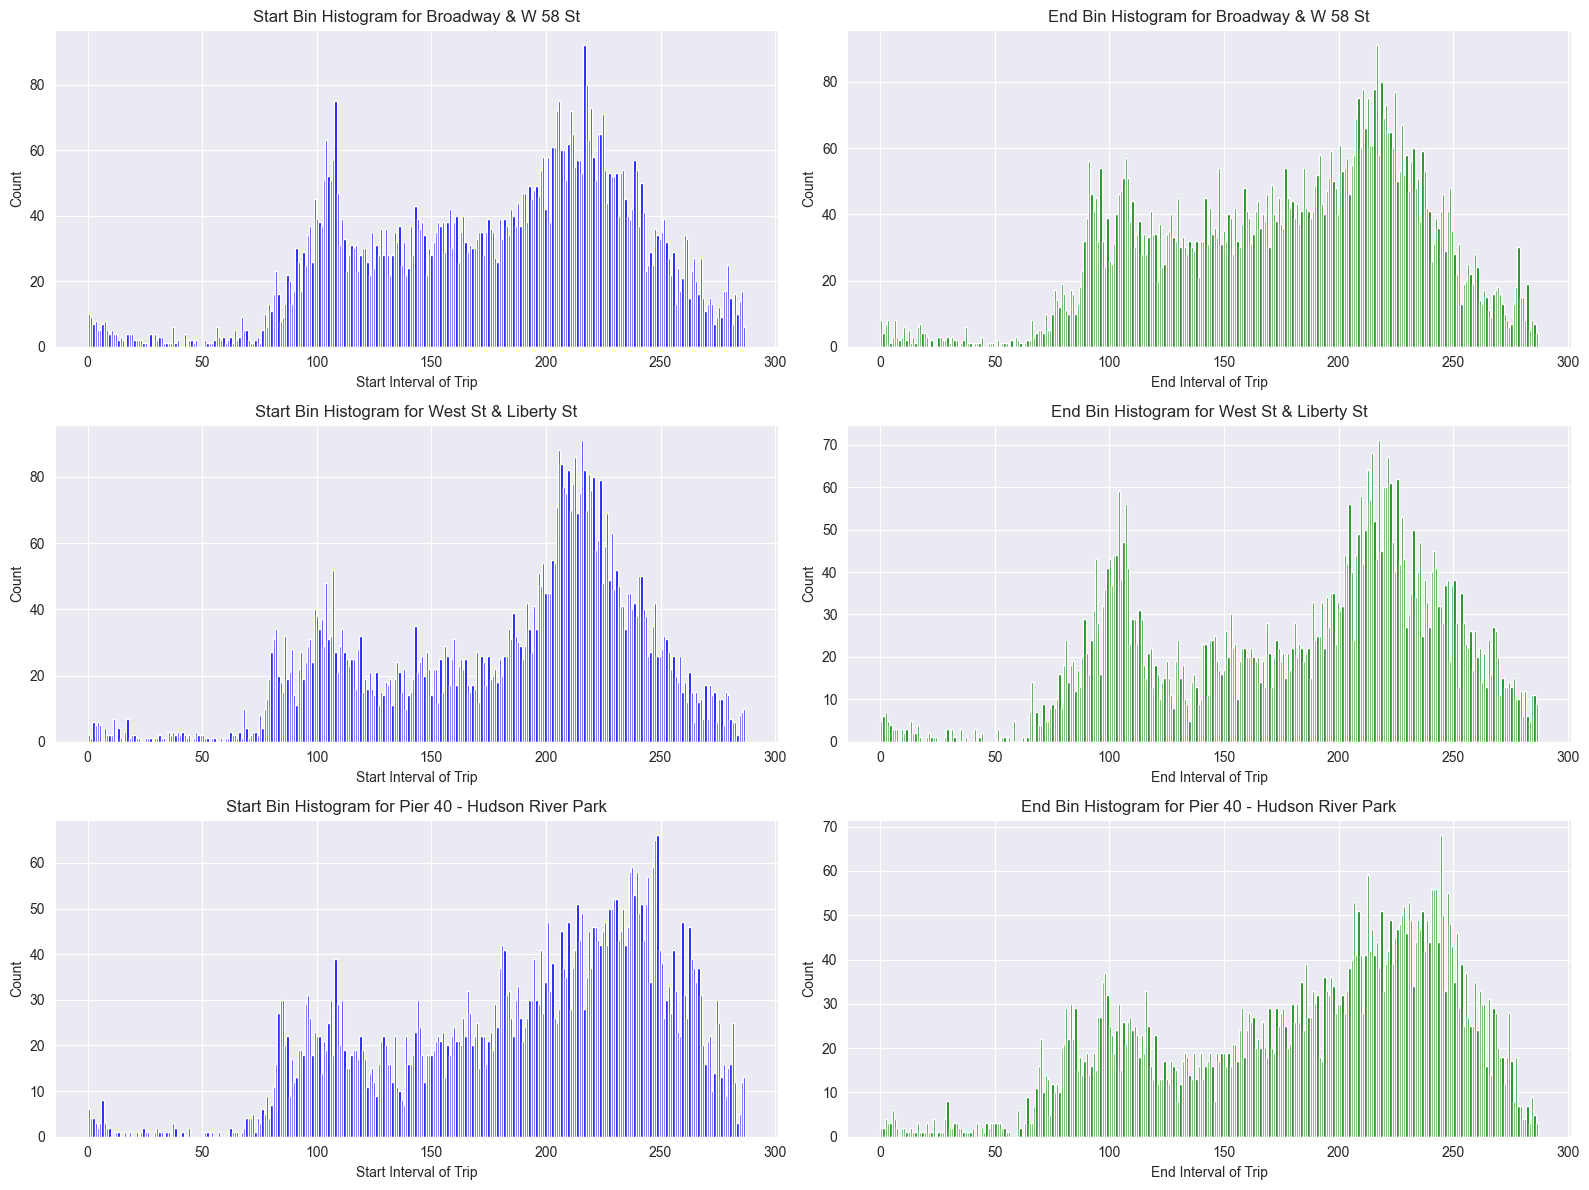

In [30]:
plt.figure(figsize=(16, 12))
for i, station_id in enumerate(station_ids):
    # Create masks for trips that start or end at the current station
    mask_st = df_stations['start_station_id'] == station_id
    mask_end = df_stations['end_station_id'] == station_id

    # Histogram for start bin (1st column)
    plt.subplot(3, 2, 2*i + 1)  # 3 rows, 2 columns, subplot index for start bin
    plt.hist(df_stations[mask_st].start_bin, bins=24*60//5, color='blue')
    plt.title(f"""Start Bin Histogram for {station_map[station_id].get("station_name")}""")
    plt.xlabel('Start Interval of Trip')
    plt.ylabel('Count')

    # Histogram for end bin (2nd column)
    plt.subplot(3, 2, 2*i + 2)  # 3 rows, 2 columns, subplot index for end bin
    plt.hist(df_stations[mask_end].end_bin, bins=288, color='green')
    plt.title(f"""End Bin Histogram for {station_map[station_id].get("station_name")}""")
    plt.xlabel('End Interval of Trip')
    plt.ylabel('Count')

plt.tight_layout()  # Adjust layout
plt.show()

## Split Morning and Evening
- Morning: 78 - 150 (6:30am - 12:30pm)
- Evening: 192 - 264 (4:00pm - 10:00pm)

In [31]:
morning_start, morning_end = 78, 150
evening_start, evening_end = 192, 264

mask_morning_st = (morning_start <= df_stations.start_bin) & (df_stations.start_bin <= morning_end) & (df_stations.start_station_id.isin(station_ids))
mask_morning_end = (morning_start <= df_stations.end_bin) & (df_stations.end_bin <= morning_end) & (df_stations.end_station_id.isin(station_ids))

mask_evening_st = (evening_start <= df_stations.start_bin) & (df_stations.start_bin <= evening_end) & (df_stations.start_station_id.isin(station_ids))
mask_evening_end = (evening_start <= df_stations.end_bin) & (df_stations.end_bin <= evening_end) & (df_stations.end_station_id.isin(station_ids))

df_stations_morn = df_stations[mask_morning_st | mask_morning_end]
df_stations_even = df_stations[mask_evening_st | mask_evening_end]

In [38]:
mask_1_st = df_stations.start_station_id == station_1_id
mask_1_end = df_stations.end_station_id == station_1_id
df_s1_m = df_stations_morn.loc[mask_1_st | mask_1_end, :]
df_s1_e = df_stations_even.loc[mask_1_st | mask_1_end, :]

In [33]:
print(f"Morning points: {len(df_s1_m)} ; Evening Points: {len(df_s1_e)}")

Morning points: 4442 ; Evening Points: 6644


In [34]:
(df_s1_m.end_station_id == station_1_id).sum()

2413

In [37]:
mask_2_st = df_stations.start_station_id == station_2_id
mask_2_end = df_stations.end_station_id == station_2_id
df_s2_m = df_stations_morn.loc[mask_2_st | mask_2_end,:]
df_s2_e = df_stations_even.loc[mask_2_st | mask_2_end,:]

In [39]:
print(f"Morning points: {len(df_s2_m)} ; Evening Points: {len(df_s2_e)}")

Morning points: 3292 ; Evening Points: 6119


In [40]:
mask_3_st = df_stations.start_station_id == station_3_id
mask_3_end = df_stations.end_station_id == station_3_id
df_s3_m = df_stations_morn.loc[mask_3_st | mask_3_end, :]
df_s3_e = df_stations_even.loc[mask_3_st | mask_3_end, :]

In [41]:
print(f"Morning points: {len(df_s3_m)} ; Evening Points: {len(df_s3_e)}")

Morning points: 2724 ; Evening Points: 5773


## Build Transition Matrix

In [70]:
def get_transition_matrix(df, station_id, bins, capacity):   
    # Column of +/- 1 if start or end at the staion
    mask_start_station = df.start_station_id == station_id
    mask_end_station = df.end_station_id == station_id
    mask_same_bin = df.start_bin == df.end_bin 
    df.loc[mask_start_station, 'ride_delta'] = 1
    df.loc[mask_end_station, 'ride_delta'] = -1
    # The ride is within the same dock and within the same bin
    df.loc[mask_start_station & mask_end_station & mask_same_bin, 'ride_delta'] = 0
    
    # For all the rides that share the same start and end station and fall within different bins we are only saving the ride as if the ride ended up in that dock, and we are not considering the (same) ride that actually left the dock 
    
    df_missed_rides = df.loc[mask_start_station & mask_end_station & ~ mask_same_bin]
    # Need this to add the missing rides
    df_missed_rides.loc[:, "true_bin"] = df_missed_rides.loc[:, "start_bin"]
    
    df.loc[df.end_station_id == station_id, 'ride_delta'] = -1
    # Put the actual bin for this station
    df.loc[:, "true_bin"] = df.loc[:, "start_bin"]
    df.loc[df.end_station_id == station_id, 'true_bin'] = df["end_bin"]
    df = pd.concat([df, df_missed_rides]).reset_index(drop=True)
    # Add date column (day of month)
    df.loc[:, "date"] = df["started_at"].dt.date
    df.loc[df.end_station_id == station_id, "date"] = df["ended_at"].dt.date
    
    df_group = df.groupby(["date", "true_bin"]).ride_delta.sum().reset_index()
    
    all_dates = df_group.date.unique()
    all_combinations =  pd.MultiIndex.from_product(
        [all_dates, bins], names=['date', 'true_bin']
    ).to_frame(index=False)
    all_combinations['ride_delta'] = 0
    
    df_merge = pd.merge(all_combinations, df_group, on=["date", "true_bin"], how="left").fillna(0)
    df_merge = df_merge.drop("ride_delta_x", axis=1)
    df_merge = df_merge.rename(columns={"ride_delta_y": "ride_delta"})
    
    df_counts = df_merge.groupby("ride_delta")['true_bin'].count().reset_index()
    
    dict_counts = df_counts.set_index('ride_delta')['true_bin'].to_dict()
    
    P = np.zeros((capacity+1, capacity+1))
    
    for start_state in range(capacity + 1):
        total_row = 0
        for end_state in range(capacity + 1):
            diff = end_state - start_state
            val = dict_counts.get(diff, 0)
            total_row += val
            P[start_state, end_state] = val
        P[start_state, :] /= total_row
    
    return P

In [71]:
morning_bins = range(morning_start, morning_end + 1)
evening_bins = range(evening_start, evening_end + 1)

In [72]:
P_s1_m = get_transition_matrix(df_s1_m, station_1_id, morning_bins, station_map[station_1_id]['dock_size'])
P_s1_m

array([[0.46690734, 0.30806258, 0.13357401, ..., 0.        , 0.        ,
        0.        ],
       [0.2736014 , 0.33916084, 0.22377622, ..., 0.        , 0.        ,
        0.        ],
       [0.12937595, 0.23820396, 0.29528158, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.28034682, 0.1849711 ,
        0.08020231],
       [0.        , 0.        , 0.        , ..., 0.24587588, 0.30479183,
        0.20109976],
       [0.        , 0.        , 0.        , ..., 0.16715831, 0.30776794,
        0.38151426]])